In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path_d = r"C:/Users/vehico/Documents/Thesis/Distance-project/Script/aggregati_municipio.csv"
file_path_t = r"C:/Users/vehico/Documents/Thesis/Distance-project/Script/aggregati_municipio_transit.csv"

# Caricare i dati aggregati
df = pd.read_csv(file_path_d)  # Dati Driving
df_transit = pd.read_csv(file_path_t)  # Dati Transit

In [4]:
# Unire i due dataset per comune
df_merged = df.merge(df_transit, on="Comune", suffixes=("_driving", "_transit"))
df_merged.head(5)

,Comune,Popolazione_totale_driving,SI_mean_km_driving,SP_mean_km_driving,SS_mean_km_driving,IC_mean_km_driving,SI_mean_min_driving,SP_mean_min_driving,SS_mean_min_driving,IC_mean_min_driving,...,SS_mean_min_transit,IC_mean_min_transit,SI_St.Dv_km_transit,SP_St.Dv_km_transit,SS_St.Dv_km_transit,IC_St.Dv_km_transit,SI_St.Dv_min_transit,SP_St.Dv_min_transit,SS_St.Dv_min_transit,IC_St.Dv_min_transit
0,ACCUMOLI,369.0,4.913220,4.913220,14.299333,14.299333,7.364995,7.364995,17.643360,17.643360,...,157.012873,157.012873,6.697290,6.697290,20.779141,20.779141,45.636663,45.636663,74.880588,74.880588
1,ACQUAFONDATA,249.0,5.072522,5.448522,10.201438,NaN,8.566533,9.149866,17.298260,NaN,...,31.350469,NaN,3.156525,36.858648,3.635943,NaN,7.719249,95.824754,0.047140,NaN
2,ACQUAPENDENTE,4502.0,2.006520,1.715522,2.261520,1.715522,4.685777,3.032663,5.408389,3.032663,...,10.763827,6.699278,11.526207,11.428711,11.186133,11.428711,16.295438,17.122783,16.888684,17.122783
3,ACUTO,1766.0,0.877558,0.877558,0.877558,7.718231,2.433484,2.433484,2.433484,10.272291,...,8.736938,62.390128,21.360091,21.360091,21.360091,3.164868,41.868220,41.868220,41.868220,20.940898
4,AFFILE,1325.0,0.292473,0.521448,0.521448,12.485212,0.765321,1.455887,1.455887,19.232252,...,6.300176,11.504918,1.373201,1.349867,1.349867,2.568212,23.853069,23.428805,23.428805,14.106780


In [ ]:
# Creare nuove colonne con la differenza tra transit e driving per ogni categoria scolastica
for category in ["SI", "SP", "SS", "IC"]:
    df_merged[f"{category}_diff_km"] = df_merged[f"{category}_mean_km_transit"] - df_merged[f"{category}_mean_km_driving"]
    df_merged[f"{category}_diff_min"] = df_merged[f"{category}_mean_min_transit"] - df_merged[f"{category}_mean_min_driving"]
    
df_merged.head(5)

,Comune,Popolazione_totale_driving,SI_mean_km_driving,SP_mean_km_driving,SS_mean_km_driving,IC_mean_km_driving,SI_mean_min_driving,SP_mean_min_driving,SS_mean_min_driving,IC_mean_min_driving,...,SS_St.Dv_min_transit,IC_St.Dv_min_transit,SI_diff_km,SI_diff_min,SP_diff_km,SP_diff_min,SS_diff_km,SS_diff_min,IC_diff_km,IC_diff_min
23,ARSOLI,1260.0,0.466,0.158,0.025,NaN,1.45,0.733333,0.116667,NaN,...,NaN,NaN,-0.035,5.066667,0.0,2.266667,0.0,0.333333,NaN,NaN


In [7]:
# Salvare il dataset con le differenze
df_merged.to_csv("differenze_municipio.csv", index=False)

In [11]:
# Calcolare statistiche per le differenze
stats = df_merged[
    ["SI_diff_min", "SP_diff_min", "SS_diff_min"]
].describe().T

stats

,count,mean,std,min,25%,50%,75%,max
SI_diff_min,365.0,22.804531,32.865539,-3.233333,5.585373,12.327672,25.963223,250.341497
SP_diff_min,366.0,23.344398,49.959680,-2.733333,5.665784,12.140612,24.997888,796.450000
SS_diff_min,365.0,30.717151,56.781086,-3.233333,6.316667,14.083333,31.969150,763.143381


In [12]:
# Aggiungere l'Intervallo Interquartile (IQR)
stats["IQR"] = stats["75%"] - stats["25%"]

stats

,count,mean,std,min,25%,50%,75%,max,IQR
SI_diff_min,365.0,22.804531,32.865539,-3.233333,5.585373,12.327672,25.963223,250.341497,20.377850
SP_diff_min,366.0,23.344398,49.959680,-2.733333,5.665784,12.140612,24.997888,796.450000,19.332104
SS_diff_min,365.0,30.717151,56.781086,-3.233333,6.316667,14.083333,31.969150,763.143381,25.652483


📌 Analisi Generale

    - Il numero di osservazioni (count) è simile per tutte le categorie, attorno a 365-366 comuni.

    - La media delle differenze è sempre positiva, il che indica che in media il trasporto pubblico richiede più tempo rispetto alla guida.

    - La deviazione standard (std) è piuttosto elevata, suggerendo una grande variabilità nei tempi di viaggio tra i comuni.

    - I valori minimi sono leggermente negativi, il che significa che in pochi casi il trasporto pubblico è più veloce della guida.

    - L'intervallo interquartile (IQR) (differenza tra il 75° percentile e il 25° percentile) indica una dispersione significativa nei dati.

    - I valori massimi mostrano delle differenze molto elevate, con alcune zone che hanno tempi di trasporto pubblico fino a 796 minuti più lunghi rispetto alla guida.

🔍 Analisi per Categoria Scolastica

    - Le scuole secondarie hanno la maggiore differenza nei tempi di viaggio (media 30.7 min, massimi fino a 763 min), suggerendo che sono più distanti o meno servite dai mezzi pubblici.

    - La variazione più grande si trova nelle scuole primarie (deviazione standard 50.0 min e massimo 796.4 min), indicando che alcuni comuni hanno un trasporto pubblico molto più lento rispetto alla guida per queste scuole.

    - Alcuni comuni hanno una differenza negativa, seppur minima, il che significa che il trasporto pubblico può essere leggermente più veloce in certi casi, forse per scuole più centrali e ben collegate.

    - L’ampio IQR suggerisce una grande disparità tra i comuni: ci sono zone dove la differenza è modesta, mentre in altre è estremamente elevata.

📊 Conclusioni

    - Il trasporto pubblico è generalmente più lento rispetto alla guida per raggiungere le scuole, ma con forti variazioni tra comuni.

    - Le scuole secondarie sono le più penalizzate, suggerendo una minor copertura dei trasporti pubblici per gli studenti più grandi.

    - Alcune zone hanno differenze enormi (oltre 700 minuti), probabilmente per collegamenti inefficienti o tragitti lunghi.

    - Un’analisi geografica su una mappa con OpenLayers potrebbe aiutare a individuare le zone più problematiche per il trasporto pubblico.

In [20]:
# Consideriamo le colonne relative alla differenza di tempo (minuti) tra transit e driving
diff_columns = ["SI_diff_min", "SP_diff_min", "SS_diff_min"]

# Calcolare la deviazione standard per ogni comune
df_merged["std_diff"] = df_merged[diff_columns].std(axis=1)

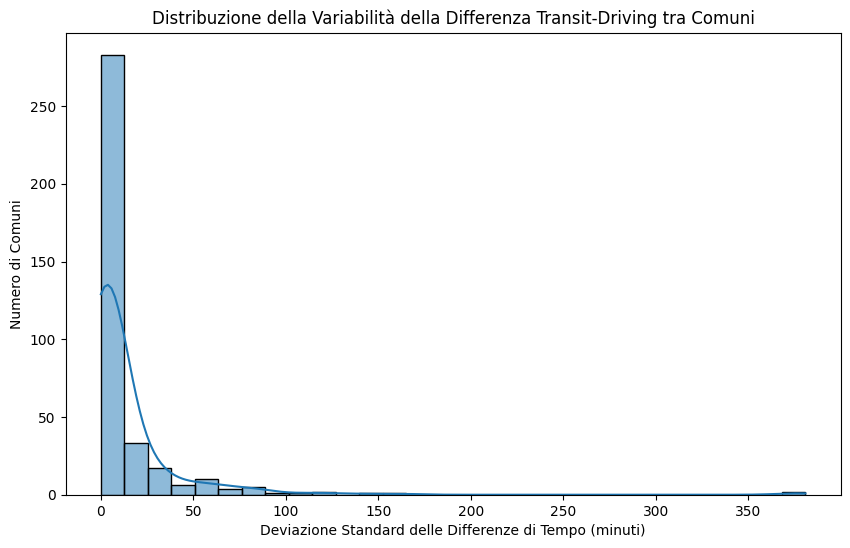

In [22]:
# Istogramma della deviazione standard tra i comuni
plt.figure(figsize=(10, 6))
sns.histplot(df_merged["std_diff"], bins=30, kde=True)
plt.xlabel("Deviazione Standard delle Differenze di Tempo (minuti)")
plt.ylabel("Numero di Comuni")
plt.title("Distribuzione della Variabilità della Differenza Transit-Driving tra Comuni")
plt.show()

Interpretazione:

    - Nella maggior parte dei comuni, la differenza tra trasporto pubblico e guida è abbastanza costante e prevedibile.

    - Tuttavia, alcuni comuni hanno una variabilità elevata, probabilmente a causa di fattori come la disponibilità del trasporto pubblico, orari variabili, presenza di più opzioni di viaggio o infrastrutture inadeguate.

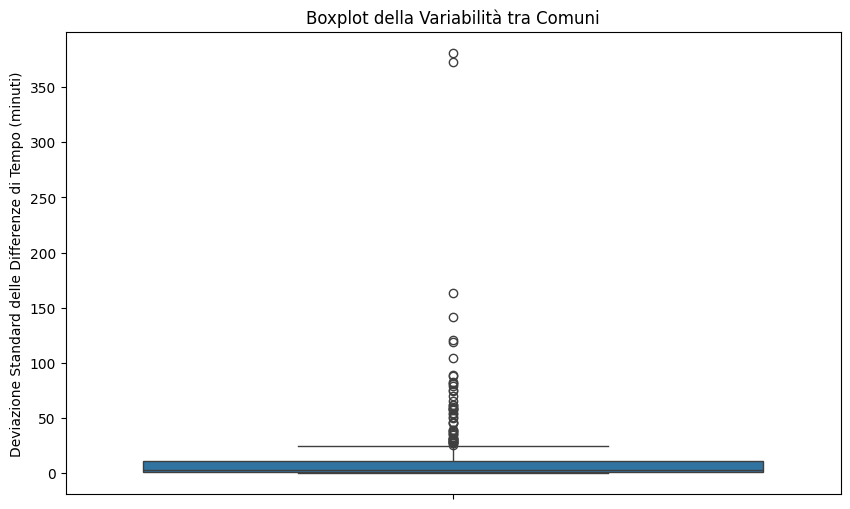

In [24]:
# Boxplot per individuare outlier
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_merged["std_diff"])
plt.ylabel("Deviazione Standard delle Differenze di Tempo (minuti)")
plt.title("Boxplot della Variabilità tra Comuni")
plt.show()

In [28]:
# Identificare i comuni con maggiore variazione
top_var_comuni = df_merged.nlargest(10, "std_diff")[["Comune", "std_diff"]]
top_var_comuni

,Comune,std_diff
201,MONTENERO SABINO,380.847808
179,MARCETELLI,373.025046
103,COLLE DI TORA,163.115029
102,COLLALTO SABINO,141.421555
142,GALLESE,120.710207
339,VACONE,118.778768
59,CAPRANICA PRENESTINA,104.397601
263,ROCCA CANTERANO,89.220099
160,JENNE,88.084406
150,GORGA,82.878631


In [29]:
# Calcolare i quartili e i limiti per identificare gli outlier
Q1 = df_merged["std_diff"].quantile(0.25)
Q3 = df_merged["std_diff"].quantile(0.75)
IQR = Q3 - Q1


In [30]:
# Definire i limiti per gli outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identificare gli outlier
outliers = df_merged[(df_merged["std_diff"] < lower_bound) | 
                          (df_merged["std_diff"] > upper_bound)]
print(f"Numero di outlier: {outliers.shape[0]}")

Numero di outlier: 51


In [39]:
# Calcolare la percentuale di outlier
percentuale_outlier = (len(outliers) / len(df_merged)) * 100
print(f"Percentuale di outlier: {percentuale_outlier:.2f}%")

Percentuale di outlier: 13.93%


In [ ]:
print("Comuni outlier:")
print(outliers[["Comune", "std_diff"]])

Comuni outlier:
                           Comune    std_diff
0                        ACCUMOLI   58.911945
1                    ACQUAFONDATA   35.346391
25                         ASCREA   50.301011
30            BASSANO IN TEVERINA   36.986523
35             BELMONTE IN SABINA   75.359299
46                 CAMERATA NUOVA   29.868254
55                      CANTERANO   31.167452
59           CAPRANICA PRENESTINA  104.397601
77           CASTELNUOVO DI FARFA   80.950303
88                CERRETO LAZIALE   45.372566
96                    CITTADUCALE   28.345787
102               COLLALTO SABINO  141.421555
103                 COLLE DI TORA  163.115029
104               COLLE SAN MAGNO   26.962258
106                    COLLEGIOVE   65.307678
107                    COLLEPARDO   58.061344
109              COLLI SUL VELINO   51.201346
112                      CONFIGNI   78.676120
133                   FONTECHIARI   30.975639
142                       GALLESE  120.710207
146               

In [45]:
# Esportare in un CSV
outliers.to_csv("outliers_comuni.csv", index=False)
print("Outliers salvati in 'outliers_comuni.csv'")

Outliers salvati in 'outliers_comuni.csv'
